In [60]:
import pandas as pd
df = pd.read_csv("data/final_dataset.csv")

In [ ]:
# some final preprocessing
dict_gender = {"M" : 1, "F" : 0}
dict_car = {"Y" : 1, "N" : 0}
dict_realty = {"Y" : 1, "N" : 0}

df = df.replace({"CODE_GENDER": dict_gender, "FLAG_OWN_CAR": dict_car, "FLAG_OWN_REALTY": dict_realty})
df

In [ ]:
df_label = df["STATUS"]
df = df.drop("STATUS", axis=1)
df = pd.get_dummies(df)
df = df.join(df_label)
df

In [ ]:
df.to_csv("data/final_dataset_re-encoded.csv", index=False)

In [61]:
df = pd.read_csv("data/data/final_dataset_re-encoded.csv")
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,STATUS
0,5008804,1,1,1,427500.0,-12005,-4542,1,0,0,...,0,0,0,0,0,0,0,0,0,A
1,5008804,1,1,1,427500.0,-12005,-4542,1,0,0,...,0,0,0,0,0,0,0,0,0,A
2,5008804,1,1,1,427500.0,-12005,-4542,1,0,0,...,0,0,0,0,0,0,0,0,0,A
3,5008804,1,1,1,427500.0,-12005,-4542,1,0,0,...,0,0,0,0,0,0,0,0,0,A
4,5008804,1,1,1,427500.0,-12005,-4542,1,0,0,...,0,0,0,0,0,0,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171988,5150467,0,0,1,180000.0,-17713,-2441,0,0,0,...,0,0,0,0,0,0,0,0,0,B
171989,5150467,0,0,1,180000.0,-17713,-2441,0,0,0,...,0,0,0,0,0,0,0,0,0,B
171990,5150467,0,0,1,180000.0,-17713,-2441,0,0,0,...,0,0,0,0,0,0,0,0,0,B
171991,5150467,0,0,1,180000.0,-17713,-2441,0,0,0,...,0,0,0,0,0,0,0,0,0,B


In [62]:
df = df.drop("ID", axis=1)

In [63]:
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,IS_SINGLE_PARENT,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,STATUS
0,1,1,1,427500.0,-12005,-4542,1,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,1,1,1,427500.0,-12005,-4542,1,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,1,1,1,427500.0,-12005,-4542,1,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,1,1,1,427500.0,-12005,-4542,1,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,1,1,1,427500.0,-12005,-4542,1,0,0,0,...,0,0,0,0,0,0,0,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171988,0,0,1,180000.0,-17713,-2441,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
171989,0,0,1,180000.0,-17713,-2441,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
171990,0,0,1,180000.0,-17713,-2441,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
171991,0,0,1,180000.0,-17713,-2441,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B


In [64]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=12)
train, val = train_test_split(train, test_size=0.25, random_state=12) # 0.25 x 0.8 = 0.2

In [57]:
print("A", train["STATUS"].value_counts()[0]/(sum(train["STATUS"].value_counts())))
print("B", train["STATUS"].value_counts()[1]/(sum(train["STATUS"].value_counts())))
print("C", train["STATUS"].value_counts()[2]/(sum(train["STATUS"].value_counts())))
print("D", train["STATUS"].value_counts()[3]/(sum(train["STATUS"].value_counts())))

A 0.5314210959833325
B 0.4495179029991763
C 0.015727506177624886
D 0.0033334948398662727


In [58]:
print("A", val["STATUS"].value_counts()[0]/(sum(val["STATUS"].value_counts())))
print("B", val["STATUS"].value_counts()[1]/(sum(val["STATUS"].value_counts())))
print("C", val["STATUS"].value_counts()[2]/(sum(val["STATUS"].value_counts())))
print("D", val["STATUS"].value_counts()[3]/(sum(val["STATUS"].value_counts())))

A 0.5305677490624727
B 0.44873397482484956
C 0.017209802610541003
D 0.00348847350213669


In [59]:
print("A", test["STATUS"].value_counts()[0]/(sum(test["STATUS"].value_counts())))
print("B", test["STATUS"].value_counts()[1]/(sum(test["STATUS"].value_counts())))
print("C", test["STATUS"].value_counts()[2]/(sum(test["STATUS"].value_counts())))
print("D", test["STATUS"].value_counts()[3]/(sum(test["STATUS"].value_counts())))

A 0.530538678449955
B 0.450914270763685
C 0.015000436059187766
D 0.0035466147271723016


In [65]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [26]:
scores = []
import matplotlib.pyplot as plt

ntrees = [int(x) for x in np.linspace(start=50, stop=1000, num=30)]
for n in ntrees:
    model = RandomForestClassifier(random_state=12, n_estimators=n)
    model.fit(train.drop("STATUS", axis=1), train['STATUS'])
    score = model.score(val.drop("STATUS", axis=1), val['STATUS'])
    scores.append(score)
    print(n, "trees,", "Accuracy = ", score)

50 trees, Accuracy =  0.9420041280269775
82 trees, Accuracy =  0.9424983284397802
115 trees, Accuracy =  0.9424983284397802
148 trees, Accuracy =  0.9427018227274049
181 trees, Accuracy =  0.9427018227274049
213 trees, Accuracy =  0.9427890345649583
246 trees, Accuracy =  0.9430215994651008
279 trees, Accuracy =  0.9429634582400651
312 trees, Accuracy =  0.9428181051774761
344 trees, Accuracy =  0.9427308933399227
377 trees, Accuracy =  0.9428762464025117
410 trees, Accuracy =  0.9428471757899939
443 trees, Accuracy =  0.9427308933399227
475 trees, Accuracy =  0.9428762464025117
508 trees, Accuracy =  0.9428181051774761
541 trees, Accuracy =  0.9427599639524404
574 trees, Accuracy =  0.9428471757899939
606 trees, Accuracy =  0.9428181051774761
639 trees, Accuracy =  0.9428181051774761
672 trees, Accuracy =  0.9428762464025117
705 trees, Accuracy =  0.9428762464025117
737 trees, Accuracy =  0.9428471757899939
770 trees, Accuracy =  0.9429053170150296
803 trees, Accuracy =  0.94270182272

0.001017471438123252


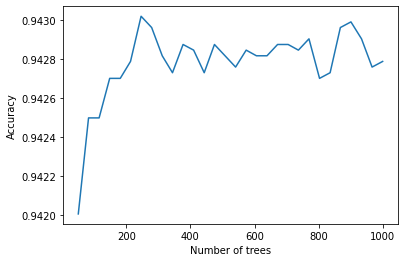

In [27]:
plt.plot(ntrees, scores)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
print(max(scores)-min(scores))

In [66]:
model = RandomForestClassifier(random_state=12, n_estimators=246)
model.fit(train.drop("STATUS", axis=1), train['STATUS'])

RandomForestClassifier(n_estimators=246, random_state=12)

In [67]:
from sklearn.metrics import classification_report
results = model.predict(val.drop("STATUS", axis=1))
matrix = classification_report(val["STATUS"], results)
print(matrix)

              precision    recall  f1-score   support

           A       0.97      0.96      0.96     18251
           B       0.93      0.95      0.94     15436
           C       0.39      0.35      0.37       592
           D       0.84      0.80      0.82       120

    accuracy                           0.94     34399
   macro avg       0.78      0.76      0.77     34399
weighted avg       0.94      0.94      0.94     34399



In [68]:
results = model.predict(test.drop("STATUS", axis=1))
matrix = classification_report(test["STATUS"], results)
print(matrix)

              precision    recall  f1-score   support

           A       0.97      0.96      0.96     18250
           B       0.93      0.95      0.94     15511
           C       0.35      0.32      0.34       516
           D       0.91      0.84      0.87       122

    accuracy                           0.94     34399
   macro avg       0.79      0.77      0.78     34399
weighted avg       0.94      0.94      0.94     34399



In [69]:
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=12)
model = RandomForestClassifier(random_state=12, n_estimators=246)
model.fit(train.drop("STATUS", axis=1), train['STATUS'])
results = model.predict(test.drop("STATUS", axis=1))
matrix = classification_report(test["STATUS"], results)
print(matrix)

              precision    recall  f1-score   support

           A       0.98      0.96      0.97     18250
           B       0.94      0.96      0.95     15511
           C       0.38      0.37      0.38       516
           D       0.94      0.84      0.88       122

    accuracy                           0.95     34399
   macro avg       0.81      0.78      0.79     34399
weighted avg       0.95      0.95      0.95     34399



In [84]:
test2 = test["STATUS"]
count = 0
count_A = 0
count_B = 0
count_D = 0
for i in test2:
    if i == "C" and results[count] != "C":
        if results[count] == "A":
            count_A += 1
        elif results[count] == "B":
            count_B += 1
        elif results[count] == "D":
            count_D += 1
    count += 1
print("A: ", count_A)
print("B: ", count_B)
print("D: ", count_D)

A:  16
B:  306
D:  2


In [32]:
print(model.feature_importances_)

[0.01663527 0.01742684 0.02214035 0.11100553 0.1606305  0.11257855
 0.01193095 0.02010665 0.00848718 0.00343809 0.284902   0.01129013
 0.01043254 0.00746373 0.00300566 0.01152107 0.0026813  0.00670091
 0.01254313 0.01068438 0.00459238 0.00167546 0.01116997 0.0076393
 0.01270497 0.00658072 0.00945146 0.00437723 0.00106195 0.00718625
 0.00396657 0.00149444 0.00210747 0.00425635 0.00443594 0.00284277
 0.00256178 0.00939662 0.00606796 0.00116989 0.00601623 0.00063778
 0.01204526 0.0013242  0.00800461 0.00476276 0.00213592 0.00045624
 0.00868686 0.00114862 0.00335337 0.0010839 ]


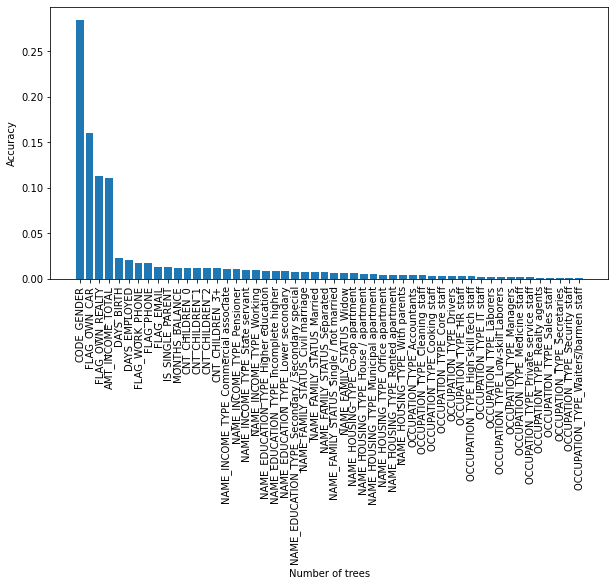

In [71]:
plt.bar(train.drop("STATUS", axis=1).columns, sorted(model.feature_importances_, reverse=True))
plt.rcParams['figure.figsize'] = [10, 5]
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)